In [1]:
#importing libraries and file

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

mkt = pd.read_csv(r"C:\Users\pedro\Desktop\Ironhack\lab-cleaning-numerical-data\files_for_lab\we_fn_use_c_marketing_customer_value_analysis.csv")
mkt.head(3)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize


In [5]:
print(mkt.shape)

(9134, 24)


In [6]:
mkt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [7]:
#function standardizing headers

def standardize_headers(df):
    cols = []
    for i in range(len(df.columns)):
        cols.append(df.columns[i].lower().replace(' ','_'))
    df.columns = cols
    return df

In [8]:
mkt=standardize_headers(mkt)
mkt.head(3)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize


In [9]:
#Changing 'effective to date' column to datetime format.
mkt['effective_to_date']=pd.to_datetime(mkt['effective_to_date'])

In [10]:
#Creating a new dataframe using only the numerical data
mkt_numerical = mkt.select_dtypes(include=[np.number])
mkt_numerical.dtypes

customer_lifetime_value          float64
income                             int64
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
total_claim_amount               float64
dtype: object

In [12]:
#Defining a function that differentiates between continuous and discrete variables.
#using criteria nunique < 500 to differentiate discrete and continuous (income, customer lifetime value and total claim amount) 

def discrete_or_continuous(df):
    condition = df.nunique()<500
    discrete = df.loc[:,condition]
    continuous = df.drop(discrete,axis=1)
    return discrete, continuous

In [13]:
#Storing continuous and discrete data into two different dataframes
mkt_numerical_discrete = discrete_or_continuous(mkt_numerical)[0]
mkt_numerical_continuous = discrete_or_continuous(mkt_numerical)[1]

In [14]:
mkt_numerical_discrete.head(3)

,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,69,32,5,0,1
1,94,13,42,0,8
2,108,18,38,0,2


In [15]:
mkt_numerical_continuous.head(3)

,customer_lifetime_value,income,total_claim_amount
0,2763.519279,56274,384.811147
1,6979.535903,0,1131.464935
2,12887.431650,48767,566.472247


In [16]:
#correlation matrix

correlations_matrix = mkt_numerical.corr()
correlations_matrix

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


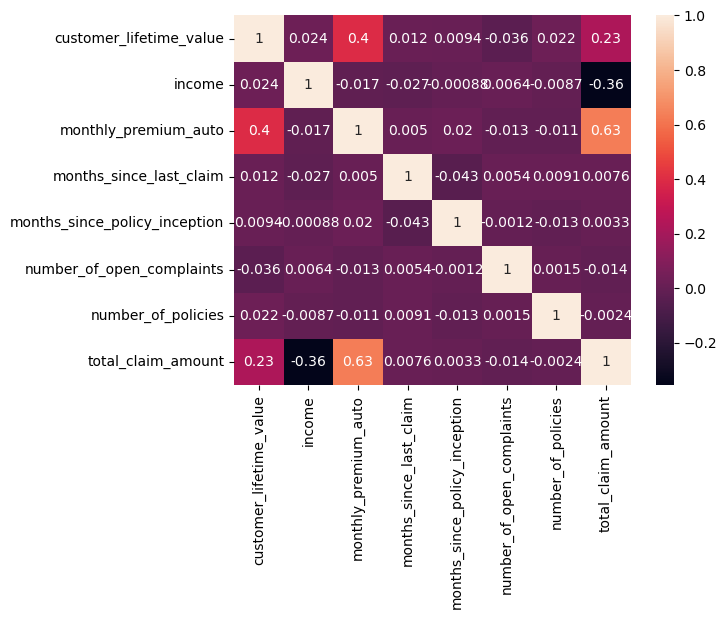

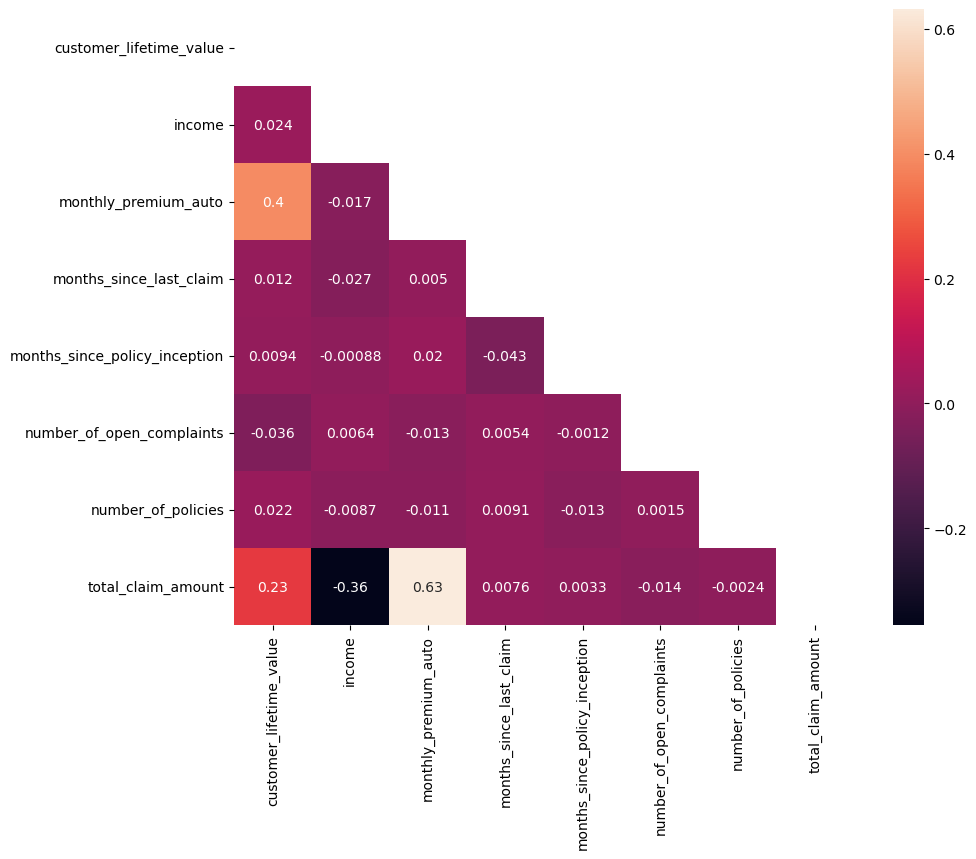

In [17]:
#correlation heat map

sns.heatmap(correlations_matrix, annot=True)
plt.show()
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True # don't include if you think it will confuse the students right now
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

In [18]:
#Creating a function to plot every numerical variable

def plot_df(df):
    for i in range(len(df.columns)):
        plt.hist(df.iloc[:,[i]])
        plt.title(list(df.columns.values)[i])
        i=i+1
        plt.show()    

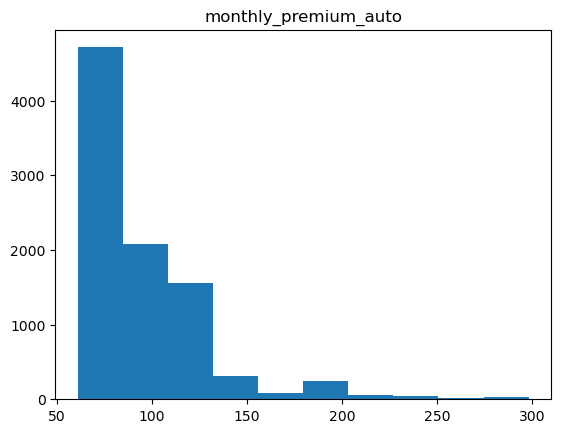

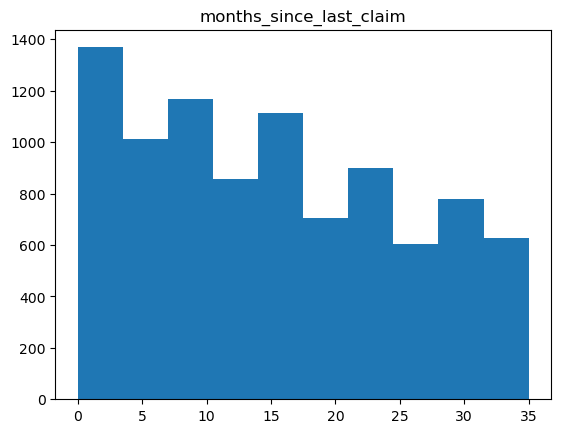

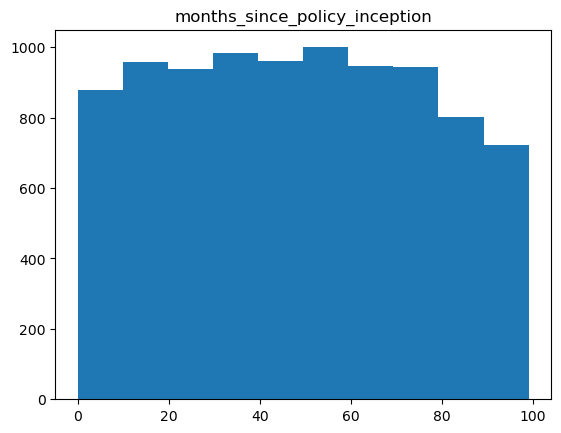

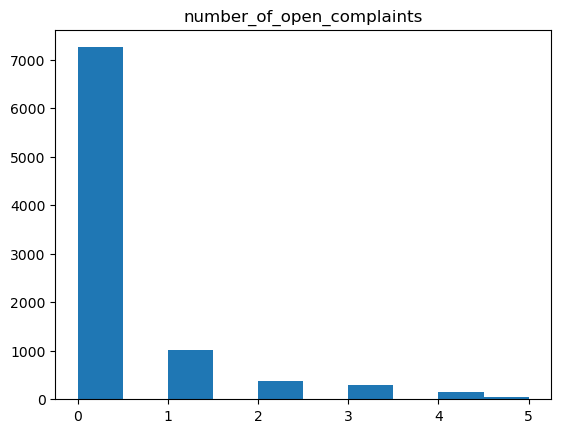

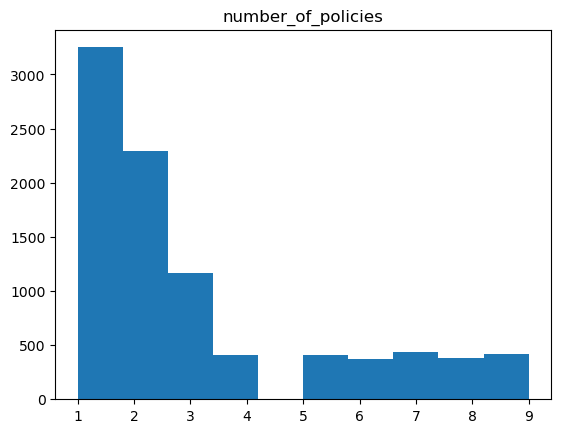

In [19]:
plot_df(mkt_numerical_discrete)

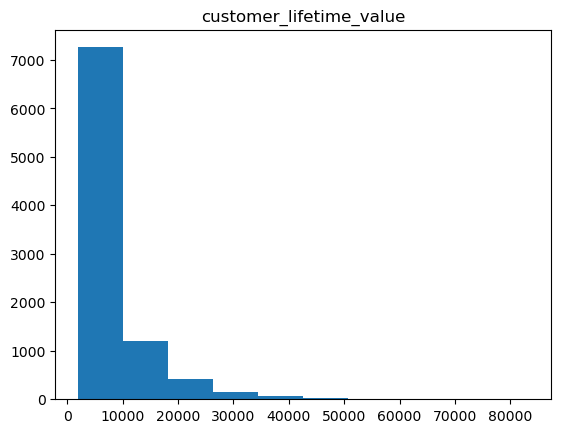

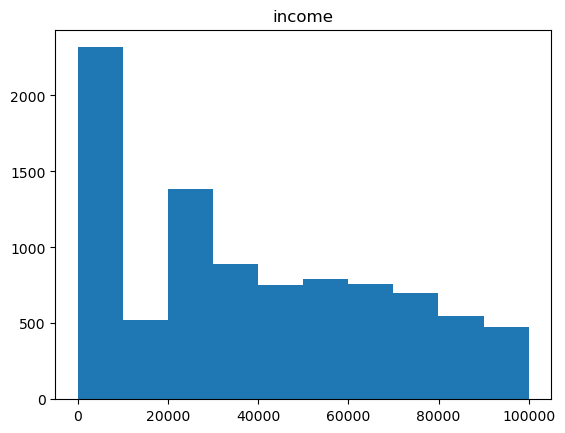

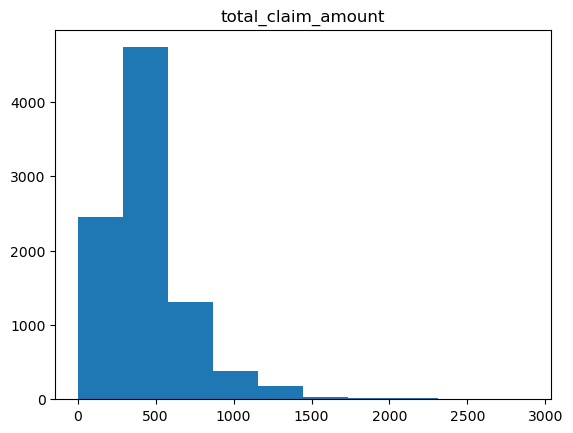

In [20]:
plot_df(mkt_numerical_continuous)

In [21]:
#Looking for outliers in the continuous variables by plotting boxplots

def boxplot_df(df):
    for i in range(len(df.columns)):
        plt.boxplot(df.iloc[:,[i]])
        plt.title(list(df.columns.values)[i])
        i=i+1
        plt.show()   

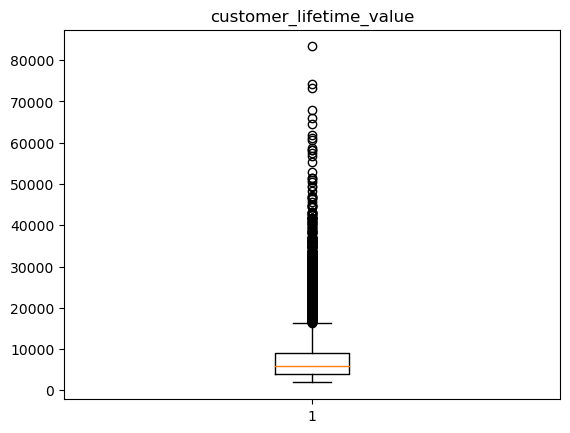

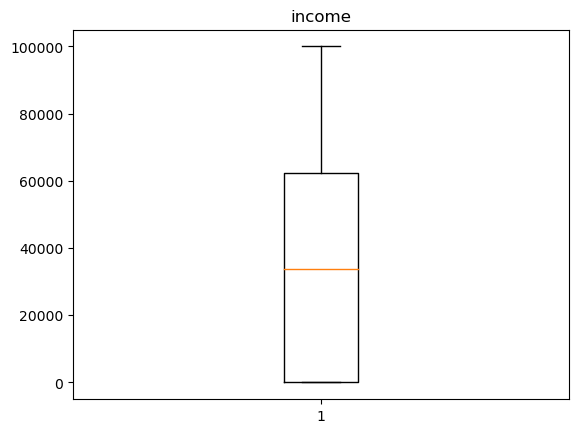

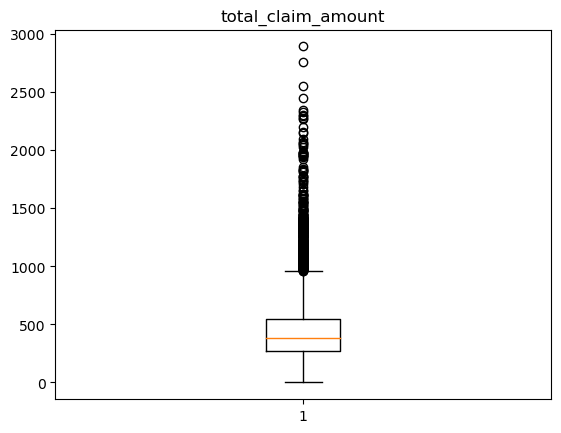

In [22]:
boxplot_df(mkt_numerical_continuous)

In [23]:
#function to indentify outliers

def find_outliers_IQR(df,column_name):
    q1=df[column_name].quantile(0.25)
    q3=df[column_name].quantile(0.75)
    IQR=q3-q1
    outliers = df[column_name][((df[column_name]<(q1-1.5*IQR)) | (df[column_name]>(q3+1.5*IQR)))]
    return outliers

In [24]:
#function to indentify extreme outliers

def find_extreme_outliers_IQR(df,column_name):
    q1=df[column_name].quantile(0.25)
    q3=df[column_name].quantile(0.75)
    IQR=q3-q1
    outliers = df[column_name][((df[column_name]<(q1-3*IQR)) | (df[column_name]>(q3+3*IQR)))]
    return outliers

In [174]:
#displaying the number of extreme outliers

outliers1 = find_extreme_outliers_IQR(mkt_numerical,'total_claim_amount')
outliers2 = find_extreme_outliers_IQR(mkt_numerical,'customer_lifetime_value')
print("number of extreme outliers: "+ str(len(outliers1)))
print("number of extreme outliers: "+ str(len(outliers2)))

number of extreme outliers: 115
number of extreme outliers: 367


In [25]:
#function to drop extreme outliers

def drop_extreme_outliers_IQR(df,column_name):
    q1=df[column_name].quantile(0.25)
    q3=df[column_name].quantile(0.75)
    IQR=q3-q1
    not_outliers = df[~((df[column_name]<(q1-3*IQR)) | (df[column_name]>(q3+3*IQR)))]
    return not_outliers

In [26]:
#dropping extreme outliers

mkt_numerical=drop_extreme_outliers_IQR(mkt_numerical,'total_claim_amount')
print(mkt_numerical.shape)
mkt_numerical=drop_extreme_outliers_IQR(mkt_numerical,'customer_lifetime_value')
print(mkt_numerical.shape)

(9019, 8)
(8651, 8)


In [27]:
#Check all columns for NaN values.

def check_NA(df):
    print(df.isna().sum().sum())
    print("\n",df.isna().sum() / len(df))

In [28]:
#No NA's
check_NA(mkt_numerical)

0

 customer_lifetime_value          0.0
income                           0.0
monthly_premium_auto             0.0
months_since_last_claim          0.0
months_since_policy_inception    0.0
number_of_open_complaints        0.0
number_of_policies               0.0
total_claim_amount               0.0
dtype: float64


In [29]:
#Saving the dataframe to csv 
mkt_numerical.to_csv(r"C:\Users\pedro\Desktop\Ironhack\lab-cleaning-numerical-data\mkt_numerical.csv")